# 버스 노선 확인 

- 271 A,B 나뉘기 전/후 비교
- 2020.03.20기준으로 분할이 되었음
- 따라서 2020.04와 2019.04를 비교해보겠습니다.  
- 하지만, 코로나로 인해 2020년도의 승객이 줄었을 가능성으로 인해 2020.02와 2020.04도 비교해보겠습니다.

In [35]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 윈도우의 한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

# 시각화 그래프가 노트북 안에 보이게 하기
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [5]:
# 서울시 버스노선별 정류장별 시간대별 승하차 인원 정보 (12월)
# url : http://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do
df_1904 = pd.read_csv('./data/BUS_STATION_BOARDING_MONTH_201904.csv',low_memory = False,encoding = 'EUC-KR')
df_2004 = pd.read_csv('./data/BUS_STATION_BOARDING_MONTH_202004.csv',low_memory = False,encoding = 'EUC-KR')
df_2002 = pd.read_csv('./data/BUS_STATION_BOARDING_MONTH_202002.csv',low_memory = False,encoding = 'EUC-KR')


In [8]:
# columns 확인
df_2004.columns ,df_2002.columns ,df_1904.columns 

(Index(['사용일자', '노선번호', '노선명', '버스정류장ARS번호', '역명', '승차총승객수', '하차총승객수', '등록일자'], dtype='object'),
 Index(['사용일자', '노선번호', '노선명', '버스정류장ARS번호', '역명', '승차총승객수', '하차총승객수', '등록일자'], dtype='object'),
 Index(['사용일자', '노선번호', '노선명', '버스정류장ARS번호', '역명', '승차총승객수', '하차총승객수', '등록일자'], dtype='object'))

In [7]:
# row개수 약 110여만개  
df_2004.shape ,df_2002.shape,df_1904.shape

((1160178, 8), (1118047, 8), (1150902, 8))

In [16]:
#일자, 노선번호, 각 정류소명에 따라 정렬이 되어있음을 확인
df_1904.head(10)
df_2002.head(10)
df_2004.head(10)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20200201,100,100번(하계동~용산구청),11428,한성여객종점,14,4,20200204
1,20200201,100,100번(하계동~용산구청),11387,노원평생학습관,7,0,20200204
2,20200201,100,100번(하계동~용산구청),11373,중계역,27,2,20200204
3,20200201,100,100번(하계동~용산구청),11381,중계목화아파트4단지,120,13,20200204
4,20200201,100,100번(하계동~용산구청),11311,인덕대학,172,123,20200204
5,20200201,100,100번(하계동~용산구청),01198,원남동,54,109,20200204
6,20200201,100,100번(하계동~용산구청),03223,이촌동현대아파트,221,49,20200204
7,20200201,101,101번(화계사~동대문),10210,쌍문동성원아파트,270,45,20200204
8,20200201,102,102번(상계동~동대문),09153,번동사거리,143,148,20200204
9,20200201,106,106번(의정부~동대문),61001,가능역.성베드로병원,12,166,20200204


In [23]:
# unique사용해서 중복 제거한 버스 확인
# 시간이 지나면서 버스가 증가했습니다.
len(df_2004['노선번호'].unique()),len(df_2002['노선번호'].unique()) , len(df_1904['노선번호'].unique())

(621, 619, 614)

In [37]:
# 분할 후 271A의 승객 수 
df_2004_271A = df_2004[df_2004['노선번호']=='271A']
df_2004_271A['총 승객수'] = df_2004_271A['승차총승객수']+df_2004_271A['하차총승객수'] 
print(format(df_2004_271A['총 승객수'].sum(),','))

937,806


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
# 분할 후 271B의 승객 수 
df_2004_271B = df_2004[df_2004['노선번호']=='271B']
df_2004_271B['총 승객수'] = df_2004_271B['승차총승객수']+df_2004_271B['하차총승객수'] 
print(format(df_2004_271B['총 승객수'].sum(),','))

253,730


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
# 271A,B 총 승객수 합
print(format(df_2004_271B['총 승객수'].sum()+df_2004_271A['총 승객수'].sum(),','))

1,191,536


In [46]:
# 분할 전 271의 승객 수 
df_2002_271 = df_2002[df_2002['노선번호']=='271']
df_2002_271['총 승객수'] = df_2002_271['승차총승객수']+df_2002_271['하차총승객수'] 
print(format(df_2002_271['총 승객수'].sum(),','))

1,480,486


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [47]:
# 분할 전 271의 승객 수 
df_1904_271 = df_1904[df_1904['노선번호']=='271']
df_1904_271['총 승객수'] = df_1904['승차총승객수']+df_1904['하차총승객수'] 
print(format(df_1904_271['총 승객수'].sum(),','))

1,881,951


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
yymm =[df_1904,df_2002,df_2004]
lists =['271','271','271A']
bus_num =[]        # 노선 번호
up_pass =[]        # 승차 승객 수 
do_pass =[]        # 하차 승객 수
agg_pass =[]       # 승,하차 승객 수 

# 버스노선 5개에 대하여 노선번호, 승/하차/총 승객 수 dataframe생성 
for i,j in zip(yymm,lists):
#     print(i)
    bus_271 = i[i['노선번호']==j]
    bus_num.append(j)
    bus_271['총 승객수'] = bus_271['승차총승객수']+bus_271['하차총승객수']
    up_pass.append(format(bus_271['승차총승객수'].sum(), ","))        # 숫자 단위 보기 쉽게 format사용
    do_pass.append(format(bus_271['하차총승객수'].sum(), ","))
    agg_pass.append(format(bus_271['총 승객수'].sum(), ","))

da = {
   '노선번호': bus_num,
    '승차총승객수': up_pass,
   '하차총승객수': do_pass,
   '총 승객수': agg_pass}
bus= pd.DataFrame(data=da)
bus

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,노선번호,승차총승객수,하차총승객수,총 승객수
0,271,"957,715","924,236","1,881,951"
1,271,"751,346","729,140","1,480,486"
2,271A,"475,725","462,081","937,806"


In [68]:
df_2005 = pd.read_csv('./data/BUS_STATION_BOARDING_MONTH_202005.csv',low_memory = False,encoding = 'EUC-KR')
df_2006 = pd.read_csv('./data/BUS_STATION_BOARDING_MONTH_202006.csv',low_memory = False,encoding = 'EUC-KR')
df_2008 = pd.read_csv('./data/BUS_STATION_BOARDING_MONTH_202008.csv',low_memory = False,encoding = 'EUC-KR')
df_2009 = pd.read_csv('./data/BUS_STATION_BOARDING_MONTH_202009.csv',low_memory = False,encoding = 'EUC-KR')
df_2010 = pd.read_csv('./data/BUS_STATION_BOARDING_MONTH_202010.csv',low_memory = False,encoding = 'EUC-KR')

In [82]:
yymm =[df_1904,df_2002,df_2004,df_2005,df_2006,df_2008,df_2009]
lists =['271','271','271A','271A','271A','271A','271A']
date = ['1904월','20년2월','20년4월','20년5월','20년6월','20년8월','20년9월']
# date = [20190401,20200201,20200401,20200501,20200601,20200801,20200901]

bus_num =[]        # 노선 번호
up_pass =[]        # 승차 승객 수 
do_pass =[]        # 하차 승객 수
agg_pass =[]       # 승,하차 승객 수 
bus_date=[]
# 버스노선 5개에 대하여 노선번호, 승/하차/총 승객 수 dataframe생성 
for i,j,k in zip(yymm,lists,date):
#     print(i)
    bus_271 = i[i['노선번호']==j]
    bus_num.append(j)
    bus_date.append(k)
    bus_271['총 승객수'] = bus_271['승차총승객수']+bus_271['하차총승객수']
    up_pass.append(format(bus_271['승차총승객수'].sum(), ","))        # 숫자 단위 보기 쉽게 format사용
    do_pass.append(format(bus_271['하차총승객수'].sum(), ","))
#     agg_pass.append(format(bus_271['총 승객수'].sum(), ","))
    agg_pass.append(bus_271['총 승객수'].sum())

da = {'날짜' : bus_date,
   '노선번호': bus_num,
    '승차총승객수': up_pass,
   '하차총승객수': do_pass,
   '총 승객수': agg_pass}
bus= pd.DataFrame(data=da)
bus

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,날짜,노선번호,승차총승객수,하차총승객수,총 승객수
0,1904월,271,"957,715","924,236",1881951
1,20년2월,271,"751,346","729,140",1480486
2,20년4월,271A,"475,725","462,081",937806
3,20년5월,271A,"512,565","497,898",1010463
4,20년6월,271A,"517,085","502,067",1019152
5,20년8월,271A,"471,338","457,882",929220
6,20년9월,271A,"455,673","443,130",898803


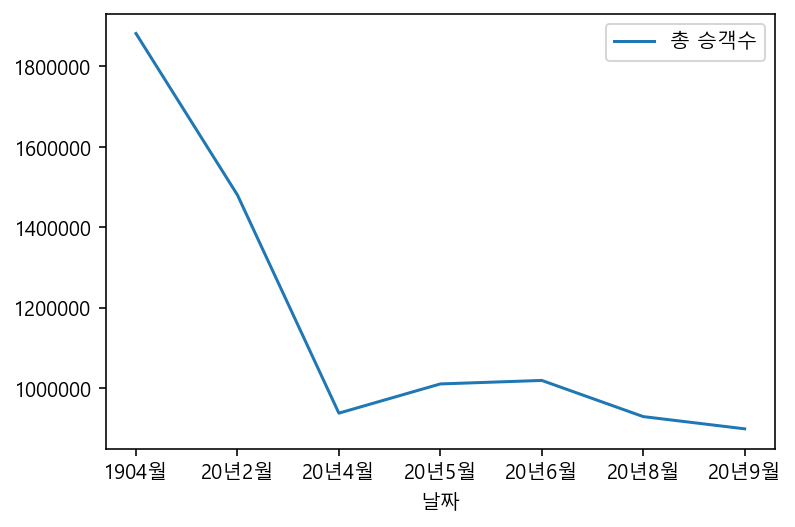

In [83]:
bus.plot.line(x='날짜',y='총 승객수')